In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [2]:
data = pd.read_csv('sales_train_evaluation.csv')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [3]:
attributes_dict = {
    'cat_ids': data['cat_id'].unique().tolist(),
    'state_ids': data['state_id'].unique().tolist(),
    'store_ids': data['store_id'].unique().tolist(),
    'dept_ids': data['dept_id'].unique().tolist()
}
attributes_dict

{'cat_ids': ['HOBBIES', 'HOUSEHOLD', 'FOODS'],
 'state_ids': ['CA', 'TX', 'WI'],
 'store_ids': ['CA_1',
  'CA_2',
  'CA_3',
  'CA_4',
  'TX_1',
  'TX_2',
  'TX_3',
  'WI_1',
  'WI_2',
  'WI_3'],
 'dept_ids': ['HOBBIES_1',
  'HOBBIES_2',
  'HOUSEHOLD_1',
  'HOUSEHOLD_2',
  'FOODS_1',
  'FOODS_2',
  'FOODS_3']}

In [4]:
data[data['item_id'] == 'HOBBIES_1_001']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
3049,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,...,2,0,2,0,2,2,0,2,0,1
6098,HOBBIES_1_001_CA_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,...,2,6,0,1,0,2,1,0,1,0
9147,HOBBIES_1_001_CA_4_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,0,...,1,0,3,1,1,1,0,1,2,2
12196,HOBBIES_1_001_TX_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,2,1,0,2,1,0,1
15245,HOBBIES_1_001_TX_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1
18294,HOBBIES_1_001_TX_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_3,TX,0,0,0,0,...,1,0,3,0,0,3,1,1,2,1
21343,HOBBIES_1_001_WI_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,...,0,1,0,2,0,0,0,0,1,2
24392,HOBBIES_1_001_WI_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_2,WI,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27441,HOBBIES_1_001_WI_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sell_prices = pd.read_csv('sell_prices.csv')

In [6]:
items = data['item_id'].unique()
items, items.size

(array(['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', ...,
        'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'], dtype=object),
 3049)

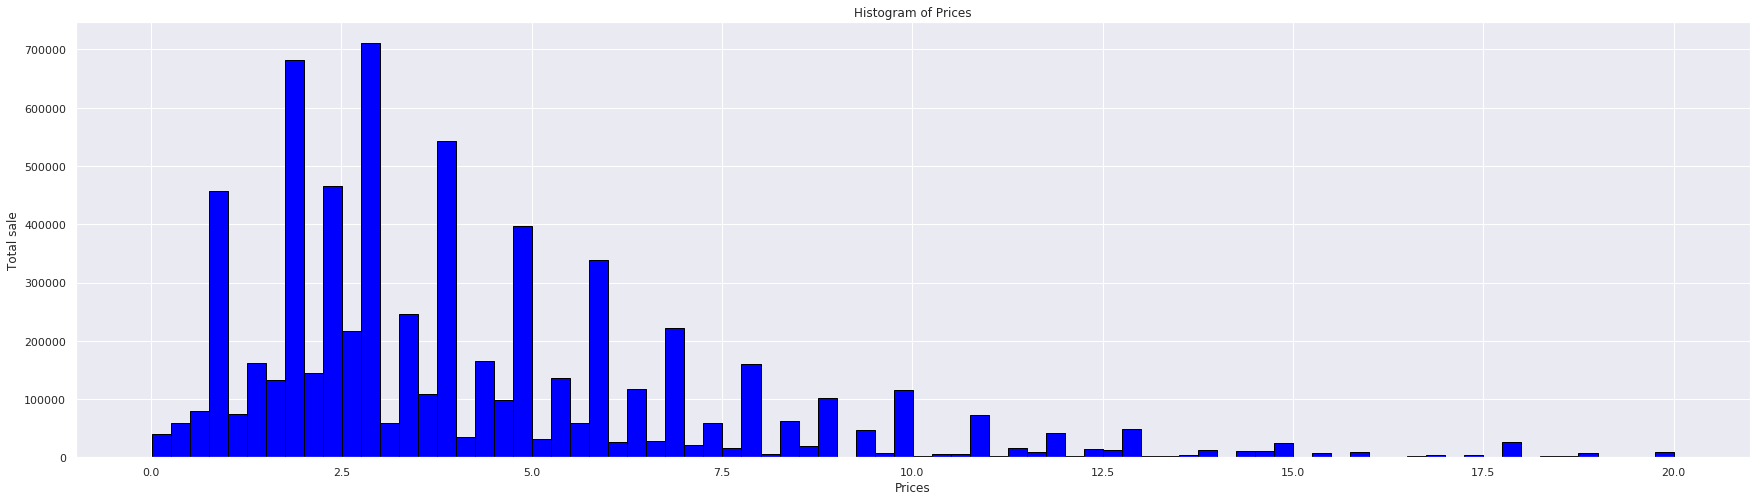

In [7]:

fig = plt.figure(figsize=(30,8))
plt.hist(sell_prices.loc[sell_prices['sell_price'] <= 20.0]['sell_price'], 
             bins=80, color = 'blue', edgecolor='black')
# Add labels
plt.title('Histogram of Prices')
plt.xlabel('Prices')
plt.ylabel('Total sale')
plt.show()

In [8]:
max(sell_prices['sell_price']), min(sell_prices['sell_price'])

(107.32, 0.01)

## Per Day sales of an item analysis

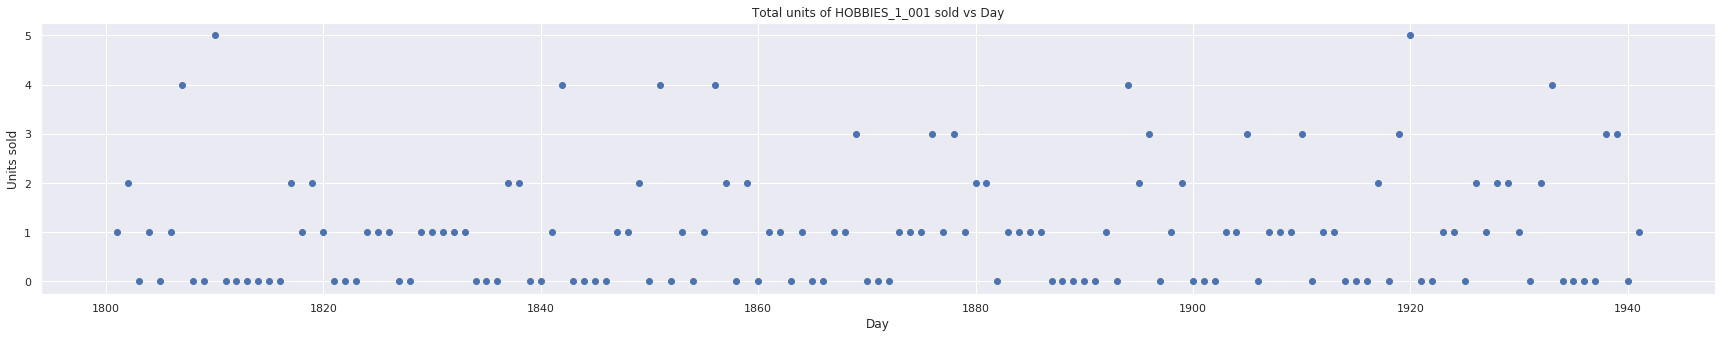

In [9]:
item_id = 'HOBBIES_1_001'
example_hobbies1 = data[(data['item_id'] == item_id) & (data['store_id'] == 'CA_1')].to_numpy()[0][6:]
plt.figure(figsize=(30,5))
plt.scatter(range(1, 1942)[1800:], example_hobbies1[1800:])
plt.xlabel('Day')
plt.ylabel('Units sold')
plt.title(f'Total units of {item_id} sold vs Day')
plt.show()

## Sales for a specified unit of time analysis

In [10]:
def sales_in_range(data, r):
    x = []; y = []
    for i in range(0,1941,r):
        if (i + r <= 1941):
            x.append(i // r + 1)
            y.append(sum(data[i:i+r]))
    return x, y

def events_in_range(data, r):
    x = []; y = []
    for i in range(0,1941,r):
        if (i + r <= 1941):
            x.append(i // r + 1)
            y.append(10 * (r - data[i:i+r].count(None)))
    return x, y
def get_sell_plot(rows):
    price_plot_x, price_plot_y = range(1,283), [0] * 282 
    for index, row in rows.iterrows():
        yr, wk = int(str(row['wm_yr_wk'])[1:3]), int(str(row['wm_yr_wk'])[3:]) 
        price_plot_y[52 * (yr - 11) + wk] = row['sell_price'] + price_plot_y[52 * (yr - 11) + wk]
    return price_plot_x, price_plot_y

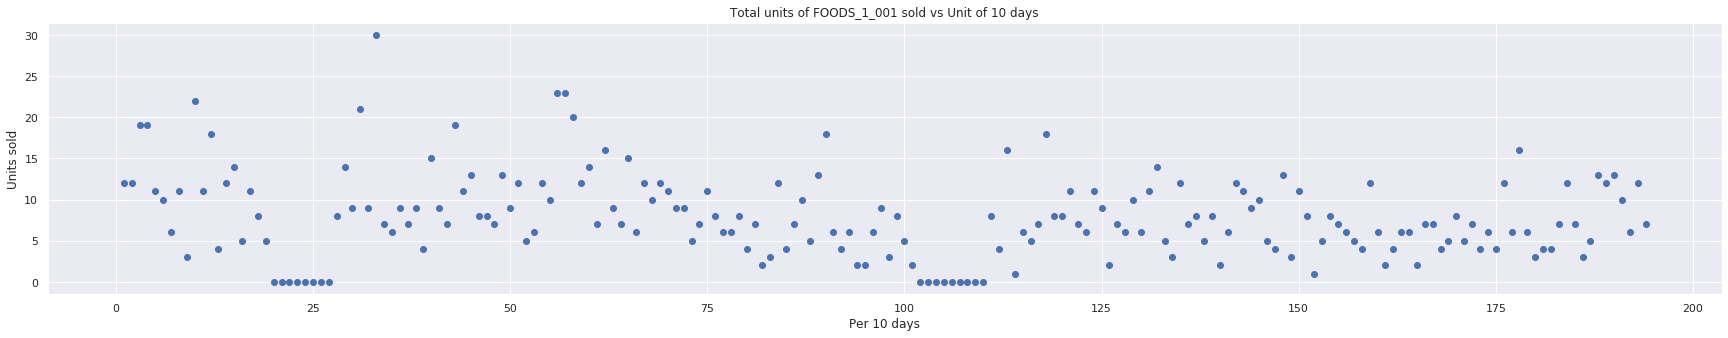

In [11]:
item_id = 'FOODS_1_001'
example = data[(data['item_id'] == item_id) & (data['store_id'] == 'CA_1')].to_numpy()[0][6:]
fig = plt.figure(figsize=(30,5))
r = 10; start = 00
x, y = sales_in_range(example, r)
plt.scatter(x[start:], y[start:])
plt.xlabel(f'Per {r} days')
plt.ylabel('Units sold')plt.title(f'Total units of {item_id} sold vs WUnit of {r} days)
plt.show()

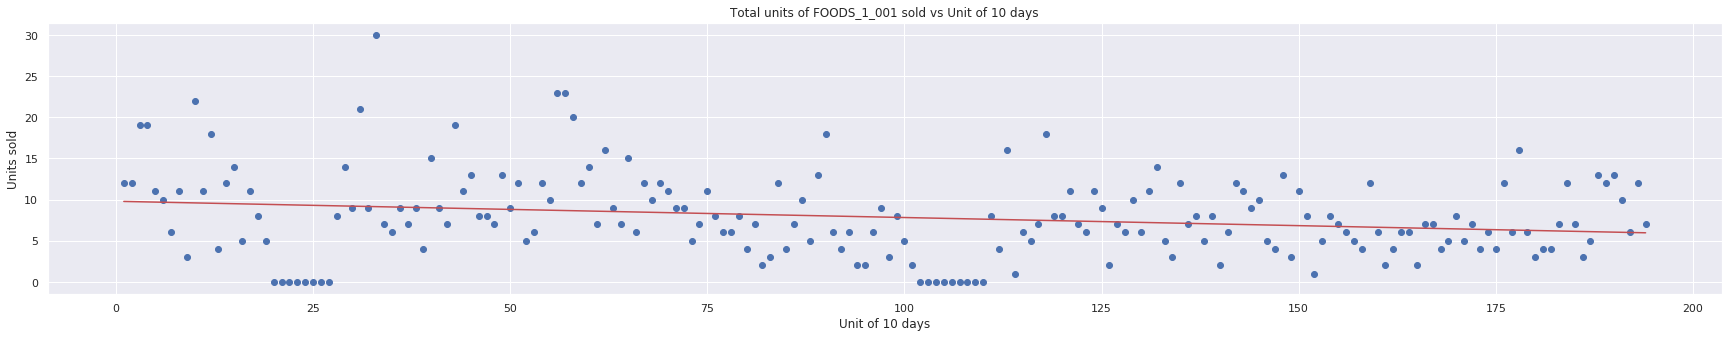

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit([[item] for item in x], y)
yhat = [reg.predict([[item]])[0] for item in x]
plt.figure(figsize=(30, 5))
plt.scatter(x[start:], y[start:])
plt.plot(x[start:], yhat[start:], '-r')
plt.xlabel(f'Unit of {r} days')
plt.ylabel('Units sold')
plt.title(f'Total units of {item_id} sold vs Unit of {r} days')
plt.show()

## Compare data of the sales in all the stores

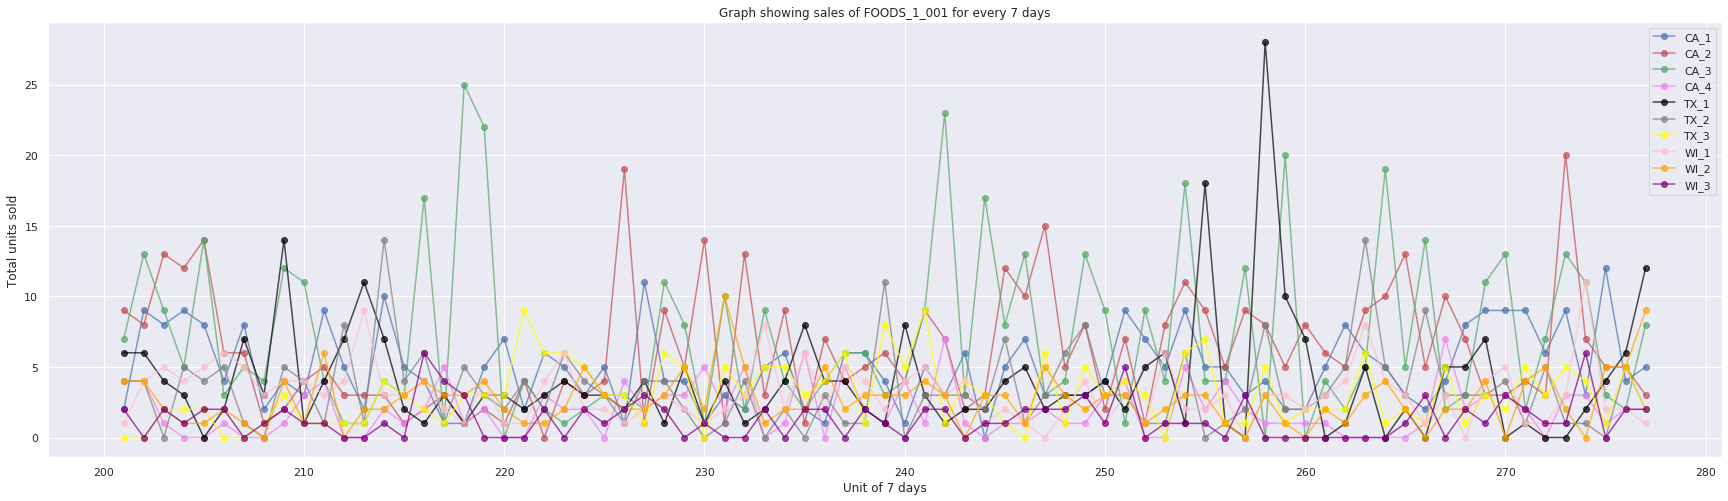

In [13]:
#compare data of one item at 10 locations
item_id = 'FOODS_1_001'
data_item = data[(data['item_id'] == item_id)].reset_index(drop=True)
plt.figure(figsize=(30,8))
c = ['b', 'r', 'g','violet','black', 'grey', 'yellow', 'pink', 'orange', 'purple']
r = 7
start = 200
total_sale = [0] * data_item.columns[6:].size
for index, row in data_item.iterrows():
    x, y = sales_in_range(row[6:], r)
    plt.plot(x[start:], y[start:], alpha=0.7, marker='o', c=c[index], label=row['store_id'])
    total_sale = [a+b for a, b in zip(total_sale, y)]

plt.legend() 
plt.xlabel(f'Unit of {r} days')
plt.ylabel('Total units sold')
plt.title(f'Graph showing sales of {item_id} for every {r} days')
plt.show()

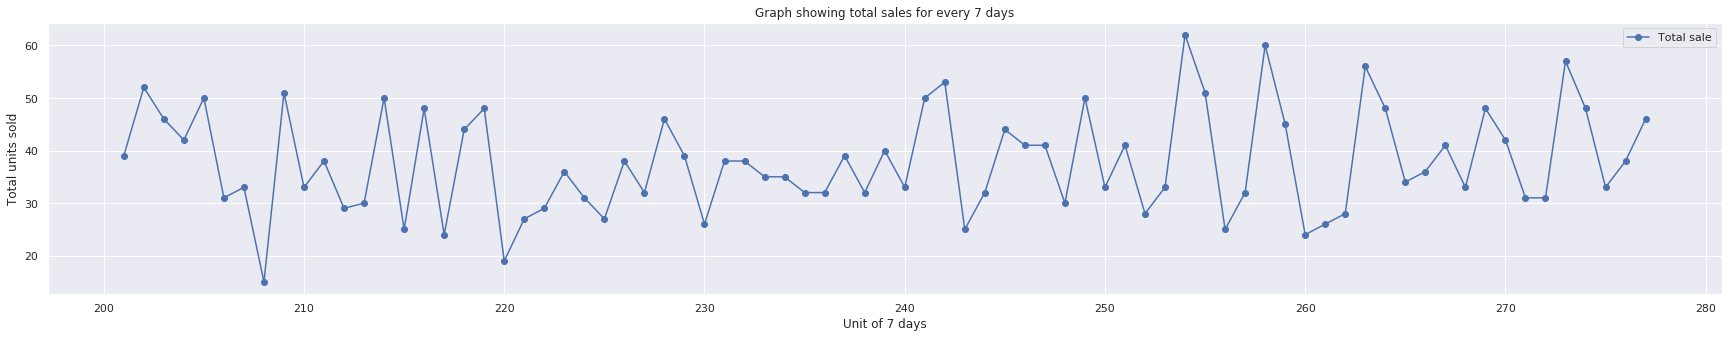

In [14]:
plt.figure(figsize=(30,5))
plt.plot(x[start:],total_sale[start:],label='Total sale',marker='o')
plt.legend() 
plt.xlabel(f'Unit of {r} days')
plt.ylabel('Total units sold')
plt.title(f'Graph showing total sales for every {r} days')
plt.show()

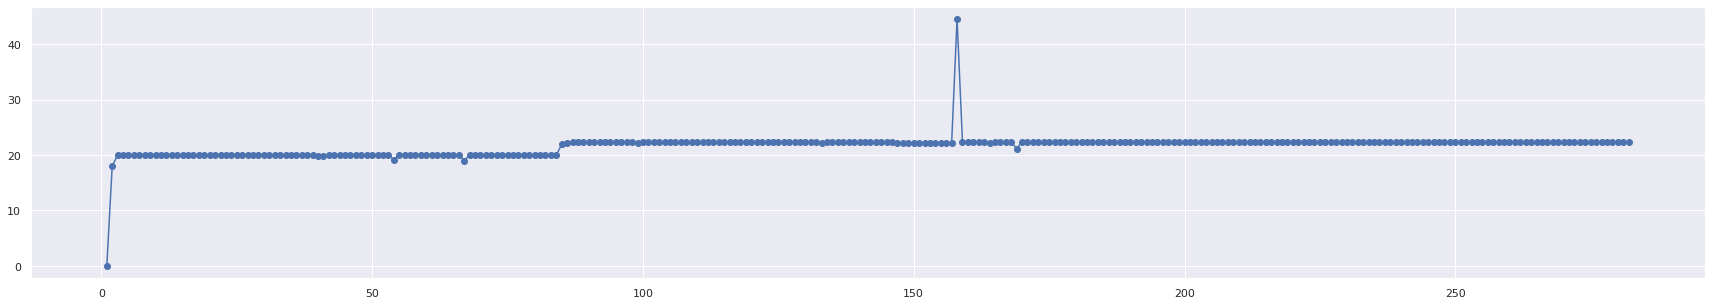

In [15]:
selling_price = sell_prices[(sell_prices['item_id'] == item_id)].reset_index(drop=True)
price_plot_x, price_plot_y = range(1,283), [0] * 282 
for index, row in selling_price.iterrows():
    yr, wk = int(str(row['wm_yr_wk'])[1:3]), int(str(row['wm_yr_wk'])[3:]) 
    price_plot_y[52 * (yr - 11) + wk] = row['sell_price'] + price_plot_y[52 * (yr - 11) + wk]
plt.figure(figsize=(30, 5))
plt.plot(price_plot_x[0:], price_plot_y[0:], marker='o')

## Price and Sales plot for one item at one store

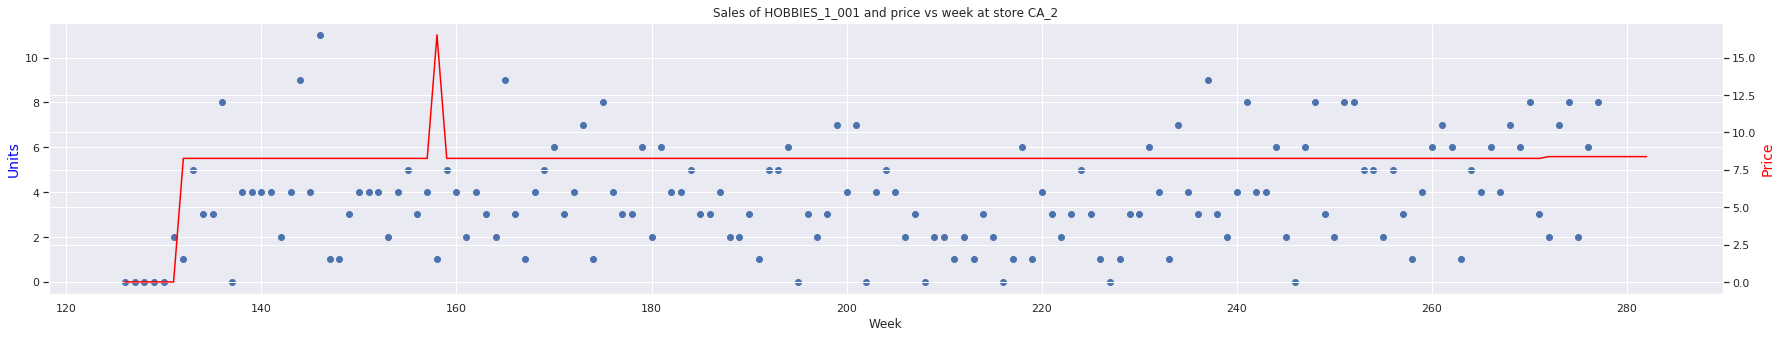

In [16]:
store_id = 'CA_2'
item_id = 'HOBBIES_1_001'
start = 125

sp_x, sp_y = get_sell_plot(sell_prices[(sell_prices['item_id'] == item_id) & (sell_prices['store_id'] == store_id)])
items_sold = data[(data['item_id'] == item_id) & (data['store_id'] == store_id)]
x, y = sales_in_range(items_sold[items_sold.columns[6:]].to_numpy()[0], 7)

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(30)

ax.set_ylabel("Units",color="blue",fontsize=14)
ax2=ax.twinx()

ax.scatter(x[start:], y[start:])
x.scattersp_x[start:], sp_y[start:]sp.size + 1), s
p, color='red')
ax2.set_ylabel("Price",color="red",fontsize=14)
ax.se
ax.set_title(f'Sales of {item_id} and price vs week at store {store_id}')
plt.show()t_xlabel('Week')

## Events Analysis

In [17]:
calender = pd.read_csv('calendar.csv')
event_calender = calender[['event_name_1', 'event_type_1', 'd']].dropna()
event_calender

,event_name_1,event_type_1,d
8,SuperBowl,Sporting,d_9
16,ValentinesDay,Cultural,d_17
23,PresidentsDay,National,d_24
39,LentStart,Religious,d_40
46,LentWeek2,Religious,d_47
...,...,...,...
1926,Mother's day,Cultural,d_1927
1948,MemorialDay,National,d_1949
1951,NBAFinalsStart,Sporting,d_1952
1956,Ramadan starts,Religious,d_1957


In [18]:
mx = 1941
events = [None] * mx
for index, row  in event_calender.iterrows():
    if int(row['d'][2:]) - 1 <= mx:
        events[int(row['d'][2:]) - 1] = row['event_name_1']
    # print(row['d'])

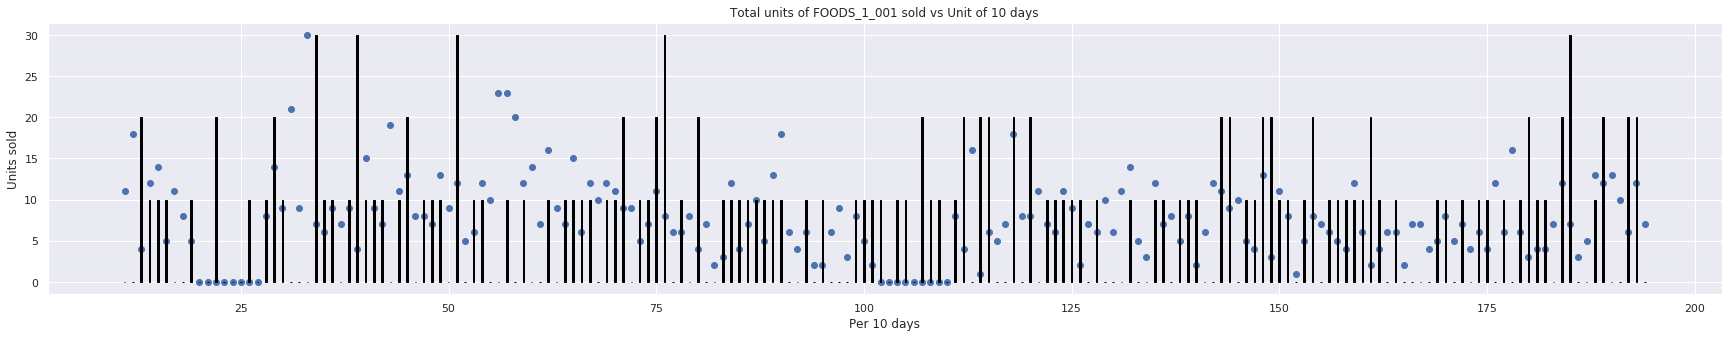

In [19]:
item_id = 'FOODS_1_001'
store_id = 'CA_1'
example = data[(data['item_id'] == item_id) & (data['store_id'] == 'CA_1')].to_numpy()[0][6:]
fig = plt.figure(figsize=(30,5))
r = 10; start = 10
x, y = sales_in_range(example, r)
plt.scatter(x[start:], y[start:])
plt.xlabel(f'Per {r} days')
plt.ylabel('Units sold')
plt.title(f'Total units of {item_id} sold vs Unit of {r} days')
fest_bar_x, fest_bar_y = x.copy() ,[0 if val == None else 20 for val in events[:1941]]
fest_bar_x, fest_bar_y = events_in_range(events, r)
plt.bar(fest_bar_x[start:], fest_bar_y[start:], color='black', width=0.2, edgecolor='black')
plt.show()